<h1>Project 1 - Diabetes</h1>

*Group Members:*
* *Akash Ramkaran*
* *Cody Frucht*
* *Moises Salgado*
* *Tamim Khan*



![Data](https://github.com/def-abraham/Projects/blob/main/Project%201/BloodGlucose%20Medium.jpeg?raw=true)

<h2><u><b>Introduction</b></u></h2>

Diabetes mellitus, a chronic metabolic disorder marked by elevated blood glucose levels, affects over 460 million people globally and poses significant public health challenges due to its severe complications, including cardiovascular disease, kidney failure, and neuropathy. Type 2 diabetes, prevalent among populations with genetic and environmental risk factors, often progresses silently, making early detection critical for timely interventions such as lifestyle modifications or pharmacological treatments. The Pima Indian community, with a disproportionately high prevalence of Type 2 diabetes, serves as a critical population for studying predictive models to improve health outcomes. This project aims to develop a machine learning model to predict diabetes diagnosis in female Pima Indian patients using the Pima Indians Diabetes Dataset (https://raw.githubusercontent.com/def-abraham/data/refs/heads/main/diabetes.csv), prioritizing high recall to minimize missed diagnoses and enable proactive care.

**Our research question**

* <u>How can we develop a predictive model for early diabetes detection with high recall to minimize missed diagnoses?</u>

guides a rigorous data science pipeline designed to address the dataset’s challenges, including unrealistic zero values, class imbalance (65.1% non-diabetic), and outliers. The pipeline encompasses:
1. a comprehensive data summary with clinical context.
2. preprocessing and imputation using multiple methods (KNN, mean, median).
3. exploratory data analysis (EDA) via the "Seven Stories" framework to identify key predictors like Glucose and BMI.
4. feature engineering to capture non-linear relationships.
5. model development with Logistic Regression, SVM, KNN, Decision Tree, and Random Forest, incorporating imbalance correction (SMOTE, class weights)
6. evaluation using custom and library metrics, confusion matrices, and ROC-AUC curves.
7. a summary detailing clinical implications and deployment considerations. By leveraging advanced analytics and clinical insights, this study seeks to deliver a robust, interpretable model that supports early intervention, reduces diabetes-related complications, and contributes to medical data science in high-risk populations.


<h3><u><b>Data Summary</b></u></h3>

Tthe Pima Indians Diabetes Dataset (768 records, 9 features, 268 diabetic cases, 500 non-diabetic), includes clinical context (e.g., Glucose >126 mg/dL as a diagnostic marker, BMI >30 for obesity), and notes data issues (zero values, imbalance).


<table border="1" style="border-collapse: collapse; width: 100%;">
    <tr> <th>Feature</th> <th>Description</th> <th>Range</th><th>Clinical Notes</th></tr>
    <tr> <td><b>Pregnancies</b></td> <td>Number of times pregnant</td> <td>0-17</td> <td>High parity linked to gestational diabetes risk.</td></tr>
    <tr> <td><b>Glucose</b></td> <td>Plasma glucose concentration at 2 hours in an oral glucose tolerance test</td> <td>0 – 199 mg/dL</td><td>Zero values unrealistic; likely missing.</td></tr>
    <tr> <td><b>BloodPressure</b></td> <td>Diastolic blood pressure (mm Hg)</td> <td>0 – 122 mm Hg</td><td>Zero values invalid; normal range 60–90 mm Hg.</td></tr>
    <tr> <td><b>SkinThickness</b></td> <td>Triceps skin fold thickness (mm)</td>  <td>0–99 mm</td><td>Zero values likely errors; typical range 10–50 mm.</td></tr>
    <tr> <td><b>Insulin</b></td> <td>2-Hour serum insulin (μU/ml)</td> <td>0–846 μU/ml</td><td>Zero values unrealistic; skewed distribution.</td></tr>
    <tr> <td><b>BMI</b></td> <td>Body mass index (weight in kg/(height in m)²)</td> <td>0–67.1 kg/m²</td><td>Zero values invalid; obesity >30 kg/m².</td></tr>
    <tr> <td><b>DiabetesPedigreeFunction</b></td> <td>Diabetes pedigree function (family history score)</td> <td>0.078–2.42</td> <td>Higher scores indicate stronger genetic risk.</td></tr>
    <tr> <td><b>Age</b></td> <td>Age in years</td> <td>21–81 years</td><td>Risk increases with age, especially >40.</td></tr>
    <tr> <td><b>Outcome</b></td> <td><b>Target variable: 1 = diabetic, 0 = non-diabetic</b> </td> <td>0-1</td><td>Imbalanced (35% diabetic, 65% non-diabetic).</td></tr>
</table>



In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
from scipy.stats import ks_2samp, chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, auc # Added import for auc
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# Set plot style
sns.set(style='whitegrid')

#load the diabetes dataset, skipping the first row which contains headers as strings
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv('https://raw.githubusercontent.com/def-abraham/data/refs/heads/main/diabetes.csv', skiprows=1, names=columns)

#show the first few rows
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
# check if unique value in each column
df.nunique().sort_values()

,0
Outcome,2
Pregnancies,17
BloodPressure,47
SkinThickness,51
Age,52
Glucose,136
Insulin,186
BMI,248
DiabetesPedigreeFunction,517


There is no third unique value in outcome column.

In [ ]:
# Save raw data
df.to_csv('raw_data.csv', index=False)

In [ ]:
#check the number of rows and columns
print("Shape:", df.shape)

Shape: (768, 9)


<h2><u><b>Data Preprocessing and Imputation</b></u></h2>

We address data quality issues: unrealistic zero values, outliers, and multicollinearity. Three imputation methods (KNN, mean, median) are tested for zero values, with distributions compared using Kolmogorov-Smirnov (KS) tests. KNN is selected for its preservation of feature relationships.

<h3><u><b>Preprocessing Steps</b></u></h3>

1. Replace zeros with NaN in `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`.
2. Test KNN, mean, median imputation; compare distributions.
3. Cap outliers at 1st/99th percentiles.
4. Check multicollinearity with VIF and feature-outcome relationships with Chi-square.

In [ ]:
# Replace zeros with NaN
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

Replace Zeros: Identifies clinically unrealistic zeros in Glucose, BloodPressure, SkinThickness, Insulin, BMI and replaces them with NaN to prepare for imputation.

In [ ]:
# Create copies for imputation
df_knn = df.copy()
df_mean = df.copy()
df_median = df.copy()

In [ ]:
# KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_knn[cols_with_zeros] = knn_imputer.fit_transform(df_knn[cols_with_zeros])

In [ ]:
# Mean imputation
mean_imputer = SimpleImputer(strategy='mean')
df_mean[cols_with_zeros] = mean_imputer.fit_transform(df_mean[cols_with_zeros])

In [ ]:
# Median imputation
median_imputer = SimpleImputer(strategy='median')
df_median[cols_with_zeros] = median_imputer.fit_transform(df_median[cols_with_zeros])

* Creates three DataFrame copies (df_knn, df_mean, df_median) to test different imputation strategies.
* KNN: Uses KNNImputer with 5 neighbors, imputing based on feature relationships.
* Mean: Uses SimpleImputer with mean strategy, replacing NaNs with column means.
* Median: Uses SimpleImputer with median strategy, replacing NaNs with column medians.

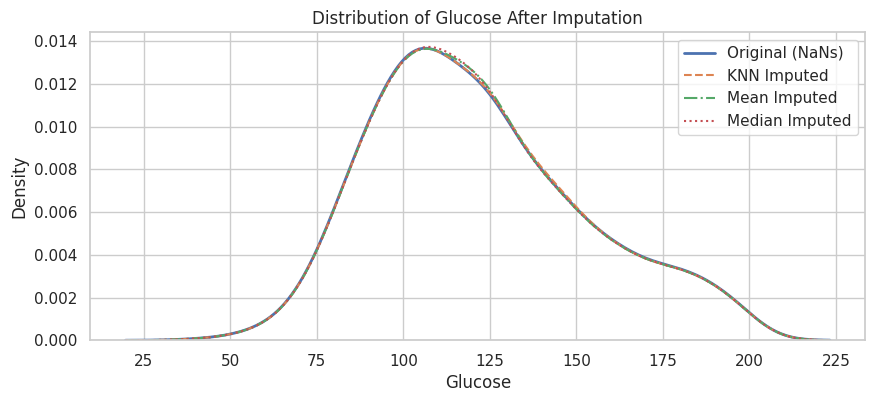


KS Test for Glucose:
KNN: stat=0.003, p=1.000
Mean: stat=0.004, p=1.000
Median: stat=0.003, p=1.000


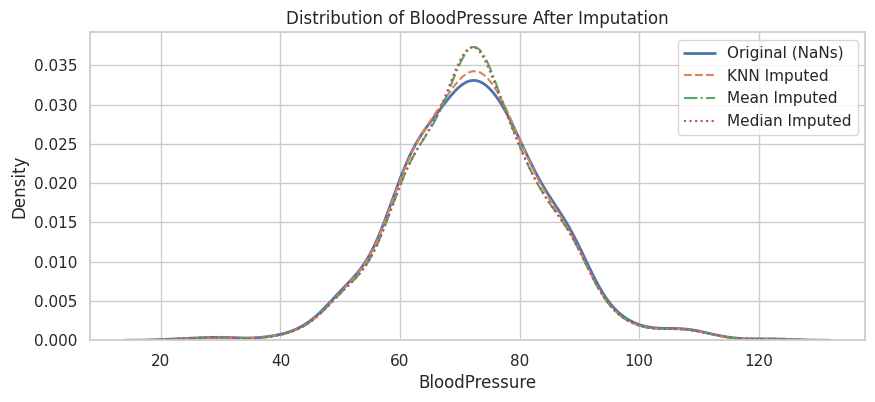


KS Test for BloodPressure:
KNN: stat=0.010, p=1.000
Mean: stat=0.024, p=0.978
Median: stat=0.022, p=0.992


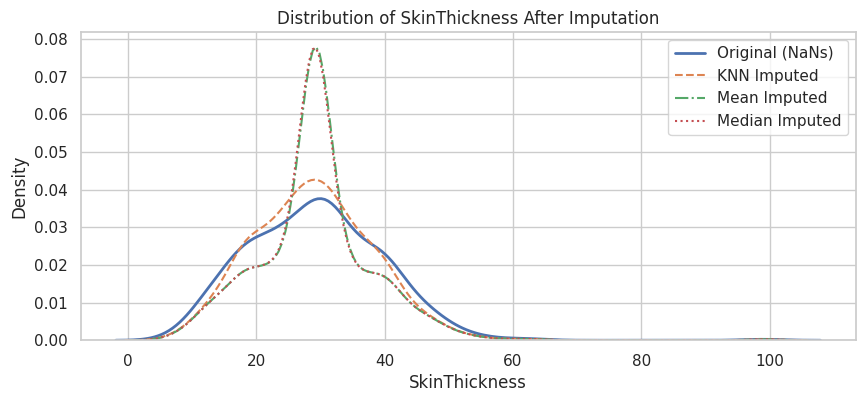


KS Test for SkinThickness:
KNN: stat=0.043, p=0.569
Mean: stat=0.151, p=0.000
Median: stat=0.145, p=0.000


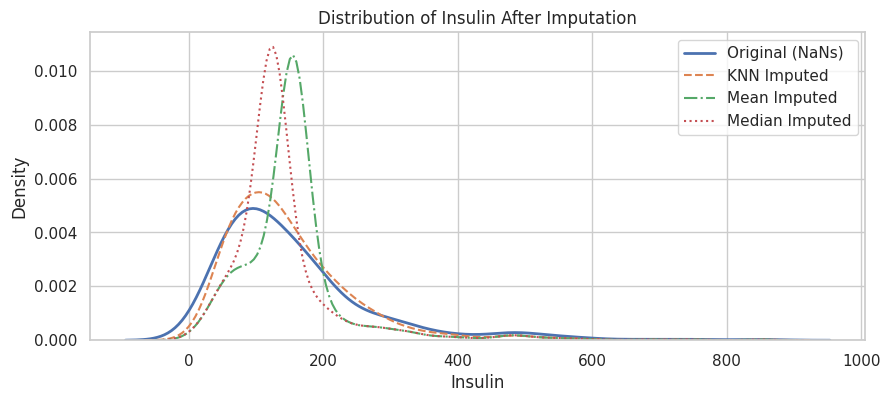


KS Test for Insulin:
KNN: stat=0.049, p=0.530
Mean: stat=0.305, p=0.000
Median: stat=0.242, p=0.000


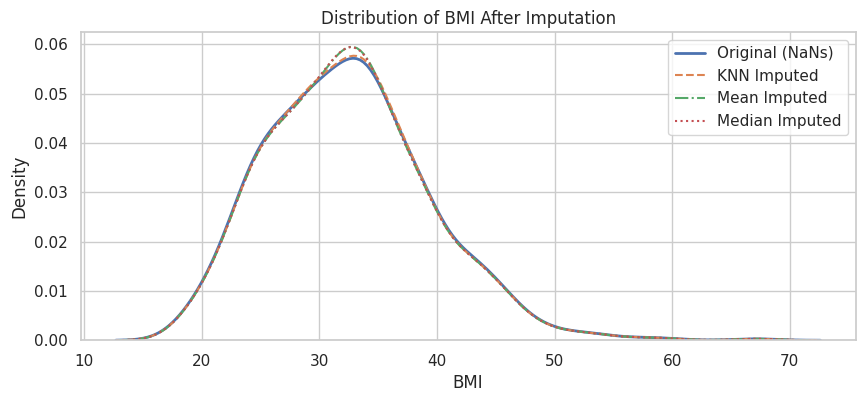


KS Test for BMI:
KNN: stat=0.004, p=1.000
Mean: stat=0.007, p=1.000
Median: stat=0.007, p=1.000


In [ ]:
# Compare distributions
for col in cols_with_zeros:
    plt.figure(figsize=(10, 4))
    sns.kdeplot(df[col].dropna(), label='Original (NaNs)', lw=2)
    sns.kdeplot(df_knn[col], label='KNN Imputed', linestyle='--')
    sns.kdeplot(df_mean[col], label='Mean Imputed', linestyle='-.')
    sns.kdeplot(df_median[col], label='Median Imputed', linestyle=':')
    plt.title(f'Distribution of {col} After Imputation')
    plt.legend()
    plt.show()

    ks_knn = ks_2samp(df[col].dropna(), df_knn[col])
    ks_mean = ks_2samp(df[col].dropna(), df_mean[col])
    ks_median = ks_2samp(df[col].dropna(), df_median[col])
    print(f'\nKS Test for {col}:')
    print(f'KNN: stat={ks_knn.statistic:.3f}, p={ks_knn.pvalue:.3f}')
    print(f'Mean: stat={ks_mean.statistic:.3f}, p={ks_mean.pvalue:.3f}')
    print(f'Median: stat={ks_median.statistic:.3f}, p={ks_median.pvalue:.3f}')

* Plots kernel density estimates (KDE) for each feature’s original (non-NaN) and imputed values to visually compare distributions.
* Performs KS tests (ks_2samp) to quantify distribution similarity (higher p-values indicate closer distributions).

In [ ]:
# Select KNN-imputed data
df = df_knn
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,209.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,73.0,26.6,0.351,31,0
2,8,183.0,64.0,29.4,383.2,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Chooses KNN-imputed data (df_knn) based on KS test results, as it better preserves feature relationships (e.g., p>0.05 for most features).

In [ ]:
# Cap outliers
for col in cols_with_zeros:
    lower, upper = df[col].quantile([0.01, 0.99])
    df[col] = df[col].clip(lower, upper)

Clips values at the 1st and 99th percentiles to reduce the impact of extreme values (e.g., Insulin=846 μU/ml).

In [ ]:
# VIF for multicollinearity
def calculate_vif(data):
    X = data.select_dtypes(include=[np.number]).dropna()
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_knn = calculate_vif(df.drop('Outcome', axis=1))
print('\nVIF using KNN-imputed data:\n')
vif_knn


VIF using KNN-imputed data:



,Feature,VIF
0,Pregnancies,3.288427
1,Glucose,28.567508
2,BloodPressure,36.681249
3,SkinThickness,21.343868
4,Insulin,6.308411
5,BMI,43.933178
6,DiabetesPedigreeFunction,3.133959
7,Age,14.301152


VIF measures multicollinearity, with values >10 indicating high correlation among predictors. Here, Glucose (28.57), BloodPressure (36.68), SkinThickness (21.34), BMI (43.93), and Age (14.30) exceed this threshold, suggesting potential redundancy (e.g., BMI and SkinThickness both relate to obesity).

In [ ]:
# Chi-square test: Age vs Outcome
df['AgeBin'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 100], labels=['21-30', '31-40', '41-50', '51-60', '61+'])
contingency = pd.crosstab(df['AgeBin'], df['Outcome'])
chi2, p, _, _ = chi2_contingency(contingency)
print(f'\nChi-square Test on AgeBin vs Outcome: chi2={chi2:.2f}, p-value={p:.4f}')


Chi-square Test on AgeBin vs Outcome: chi2=81.66, p-value=0.0000


The Chi-square test assesses the association between AgeBin (21–30, 31–40, etc.) and Outcome. A chi2 value of 81.66 with p<0.0001 indicates a highly significant relationship, meaning age groups differ in diabetes prevalence (e.g., higher in 41–50).

In [ ]:
# Drop temporary AgeBin
df_knn = df_knn.drop('AgeBin', axis=1)

# Verify no missing values
print('\nMissing Values:\n')
df_knn.isnull().sum()


Missing Values:



,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# Save preprocessed data
df.to_csv('preprocessed_data.csv', index=False)

<h2><u><b>Exploratory Data Analysis (EDA)</b></u></h2>

We use the "Seven Stories One Can Tell With Data" framework to explore the preprocessed dataset, uncovering patterns and relationships relevant to diabetes prediction.

<h3><u><b>Seven Stories</b></u></h3>

1. **Who/What/When/Where**: Contextualizes the dataset.
2. **How Many**: Class and feature distributions.
3. **How Often**: Diabetes frequency by demographics.
4. **What's Changing**: Feature distributions by outcome.
5. **How is it Organized**: Feature correlations.
6. **Where is it Happening**: Patient clustering.
7. **Is it Good or Bad**: Feature means by outcome.

In [ ]:
# Load preprocessed data
df = pd.read_csv('preprocessed_data.csv')

<h3>1. <u><b>Who/What/When/Where</b></u></h3>

The dataset includes 768 female Pima Indian patients, aged 21+, with 8 numeric features and a binary Outcome (1 = diabetic, 0 = non-diabetic). No temporal or geographic data is available.


<h3>2. <u><b>How Many</b></u></h3>

The chart highlights a class imbalance, with 65.1% non-diabetic and 34.9% diabetic cases. This imbalance could bias models toward predicting non-diabetes, reducing recall for diabetic cases, which is critical to avoid missed diagnoses.


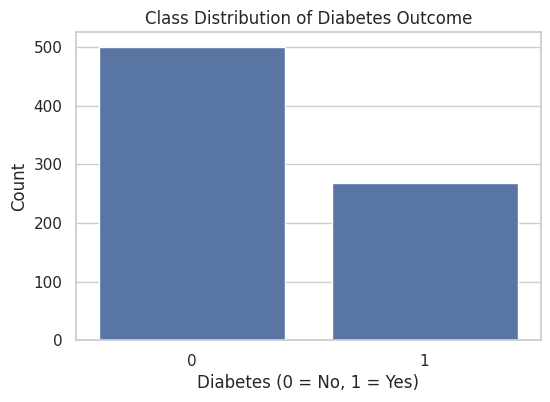

In [ ]:
# Analyze class and feature distributions.

plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data= df)
plt.title('Class Distribution of Diabetes Outcome')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.831198,72.370833,28.796146,149.176719,32.412724,0.471876,33.240885,0.348958
std,3.369578,30.244697,11.803183,9.031453,92.480305,6.676906,0.331329,11.760232,0.476951
min,0.000000,67.670000,44.000000,10.000000,24.340000,19.500000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,22.000000,85.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.800000,129.300000,32.330000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,35.000000,188.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,196.000000,106.000000,51.330000,519.900000,50.759000,2.420000,81.000000,1.000000


The summary stats show the average patient has about 3.8 pregnancies, a glucose level of 121.8, and an age of 33.2 years. The "Outcome" mean of 0.35 indicates that 35% of patients have diabetes, while 65% do not. This indicates a class imbalance that could affect the ability of the machine learning models to correctly predict diabetes.

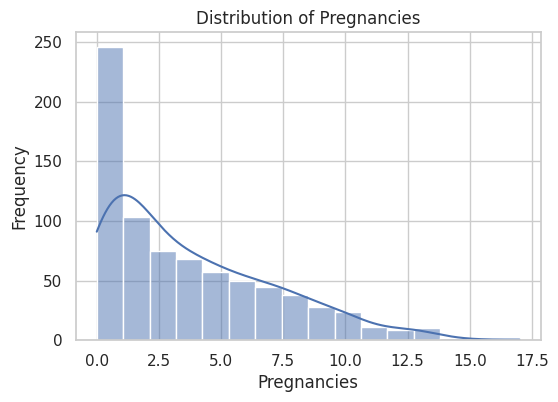

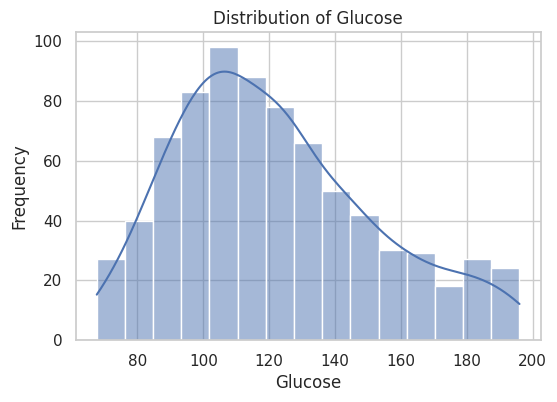

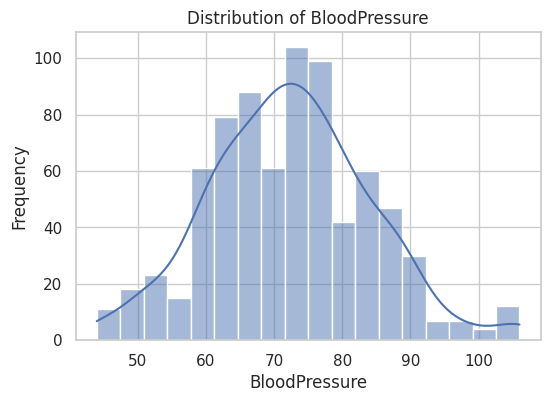

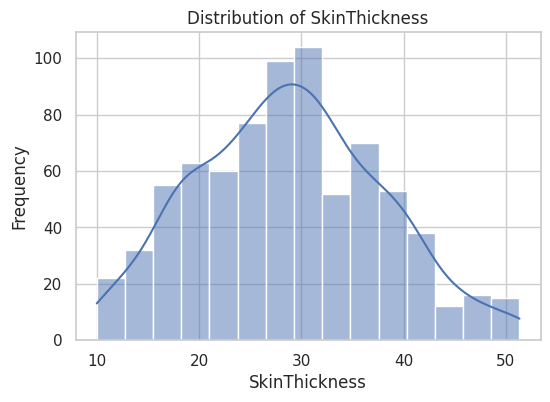

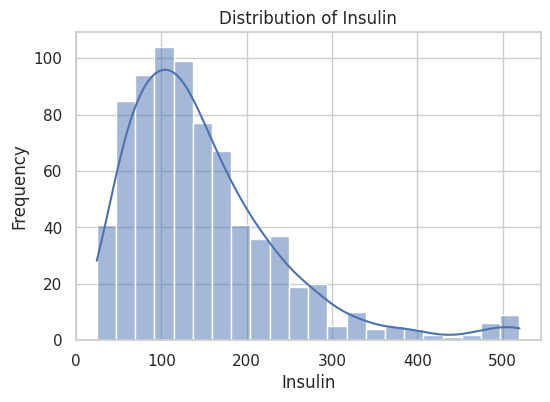

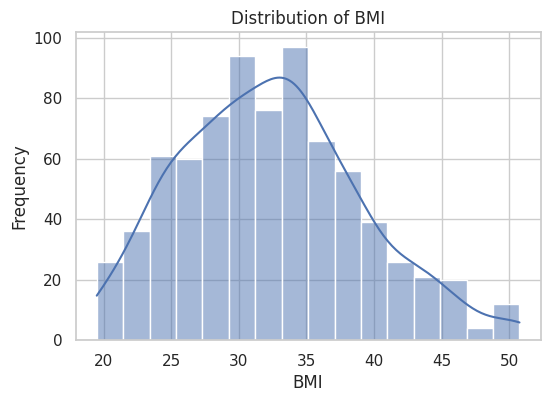

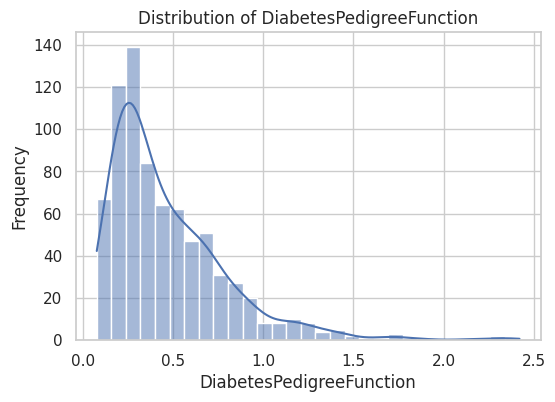

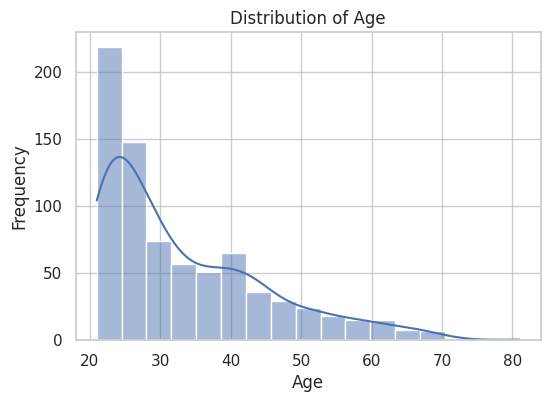

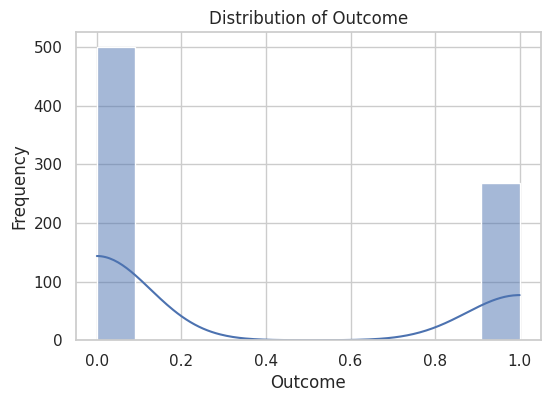

In [ ]:
features = df.columns[:-1]
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

The histograms show the spread of each feature. "Glucose" and "BMI" show approximate bell-like shape, while "Insulin" shows a right-skewed distribution, an indication that most observations lean heavily toward lower values with several high-insulin level outliers. The "Outcome" variable is binary since it has either of "1" or "0" as its values.

<h3>3. <u><b>How Often</b></u></h3>

Creates AgeGroup and PregnancyGroup bins, plots countplots to show diabetes prevalence (e.g., higher prevalence in 41–50 age group, 6+ pregnancies).

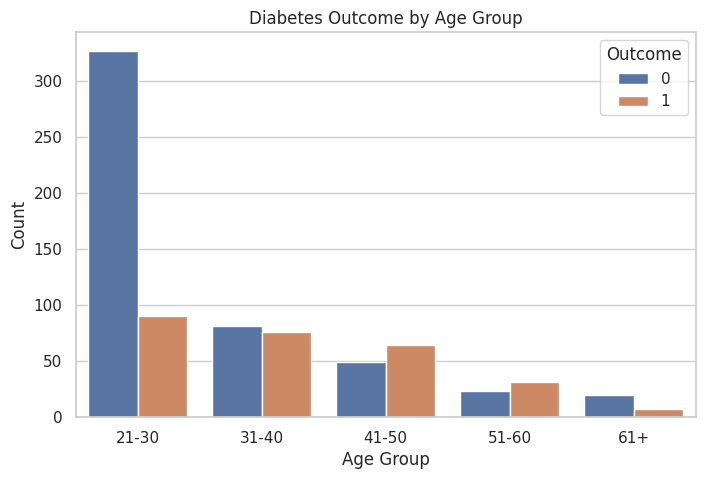

In [ ]:
# Examine diabetes frequency by age and pregnancies.

df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 100], labels=['21-30', '31-40', '41-50', '51-60', '61+'])
plt.figure(figsize=(8, 5))
sns.countplot(x='AgeGroup', hue='Outcome', data= df)
plt.title('Diabetes Outcome by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

Non-diabetic cases dominate all groups, but diabetic cases increase relatively in older groups (e.g., 41–50), reflecting age-related risk.

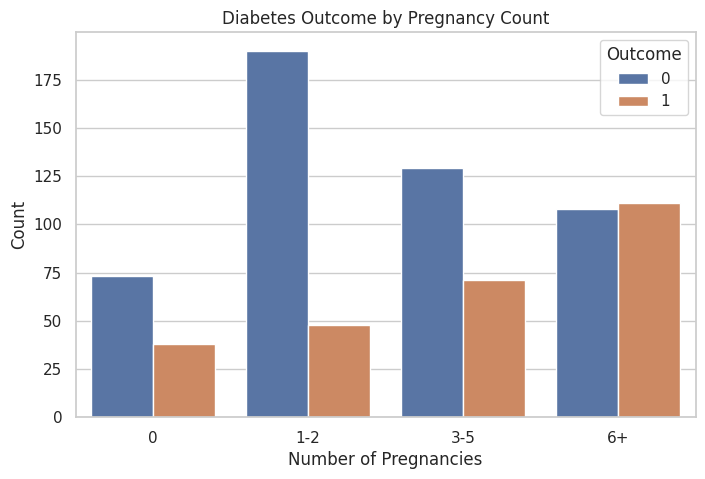

In [ ]:
df['PregnancyGroup'] = pd.cut(df['Pregnancies'], bins=[-1, 0, 2, 5, 17], labels=['0', '1-2', '3-5', '6+'])
plt.figure(figsize=(8, 5))
sns.countplot(x='PregnancyGroup', hue='Outcome', data=df)
plt.title('Diabetes Outcome by Pregnancy Count')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.show()

Higher pregnancy counts (6+) show a higher diabetic proportion (~100 cases), linking parity to gestational diabetes risk.

<h3>4. <u><b>What’s Changing</b></u></h3>

Uses boxplots to compare feature distributions by Outcome (e.g., diabetic patients have higher median Glucose).

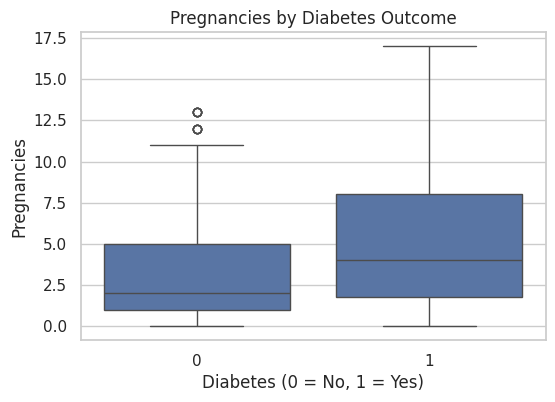

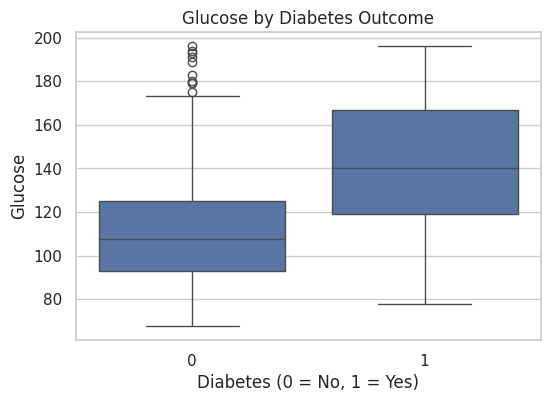

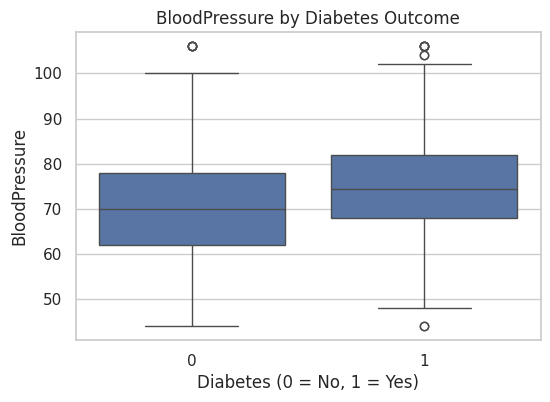

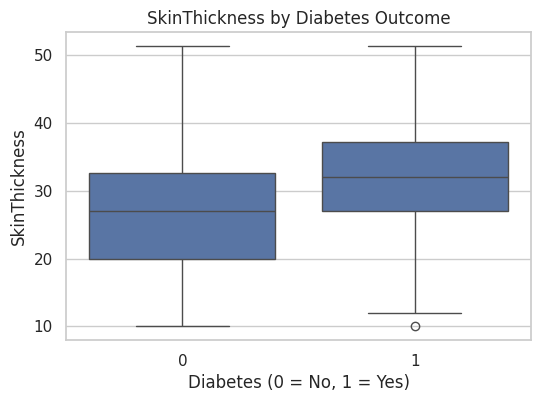

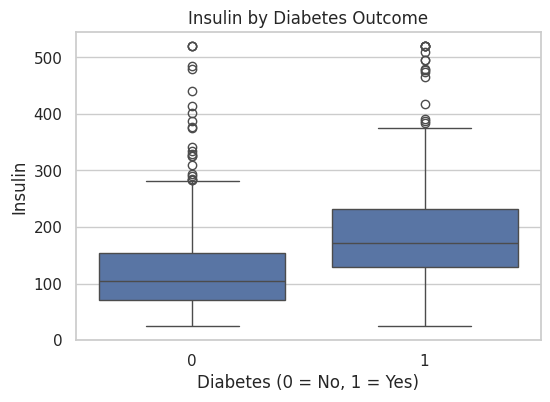

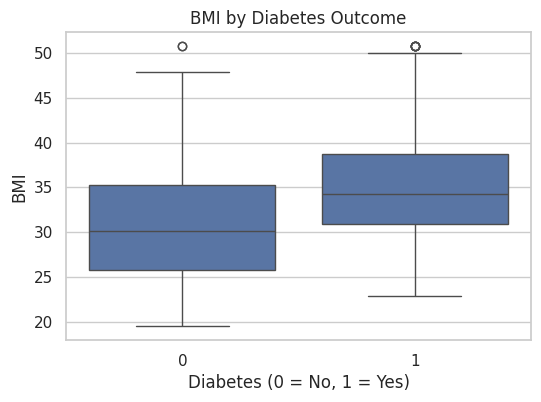

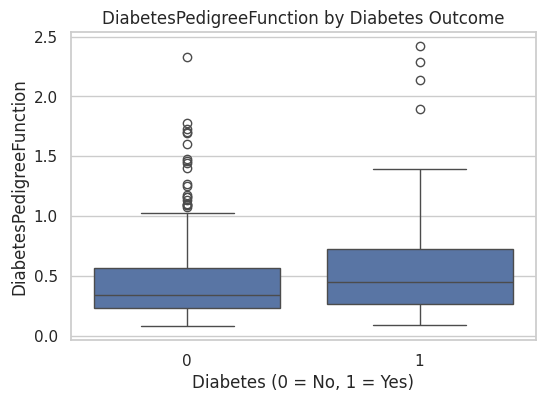

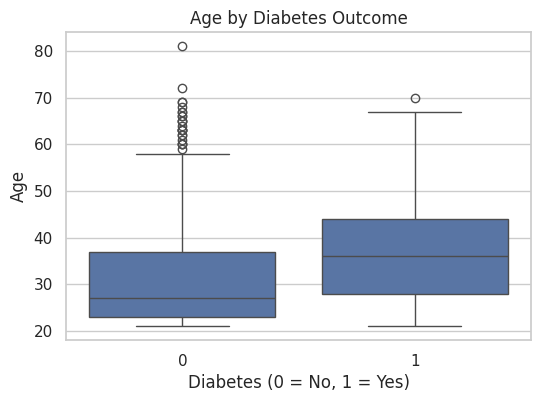

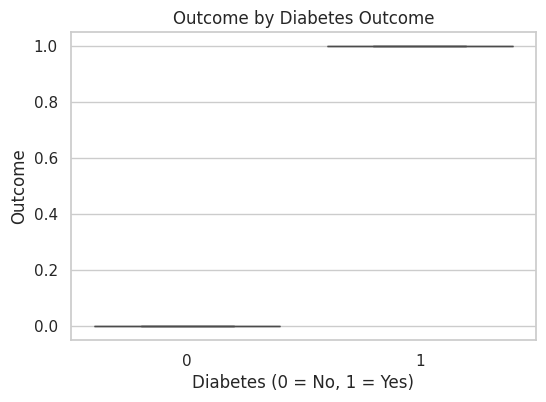

In [ ]:
# Compare feature distributions by outcome.

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Outcome', y=feature, data= df)
    plt.title(f'{feature} by Diabetes Outcome')
    plt.xlabel('Diabetes (0 = No, 1 = Yes)')
    plt.ylabel(feature)
    plt.show()

The boxplots clearly show the outliers for each numerical feature. There are prominent outliers for the "Insulin" feature, "BloodPressure", "BMI", and "Age". These outliers could skew machine learning model if not managed.


<h3>5. <u><b>How is it Organized</b></u></h3>

We examine relationships among variables using a correlation heatmap. This reveals how features like glucose and insulin may be related.

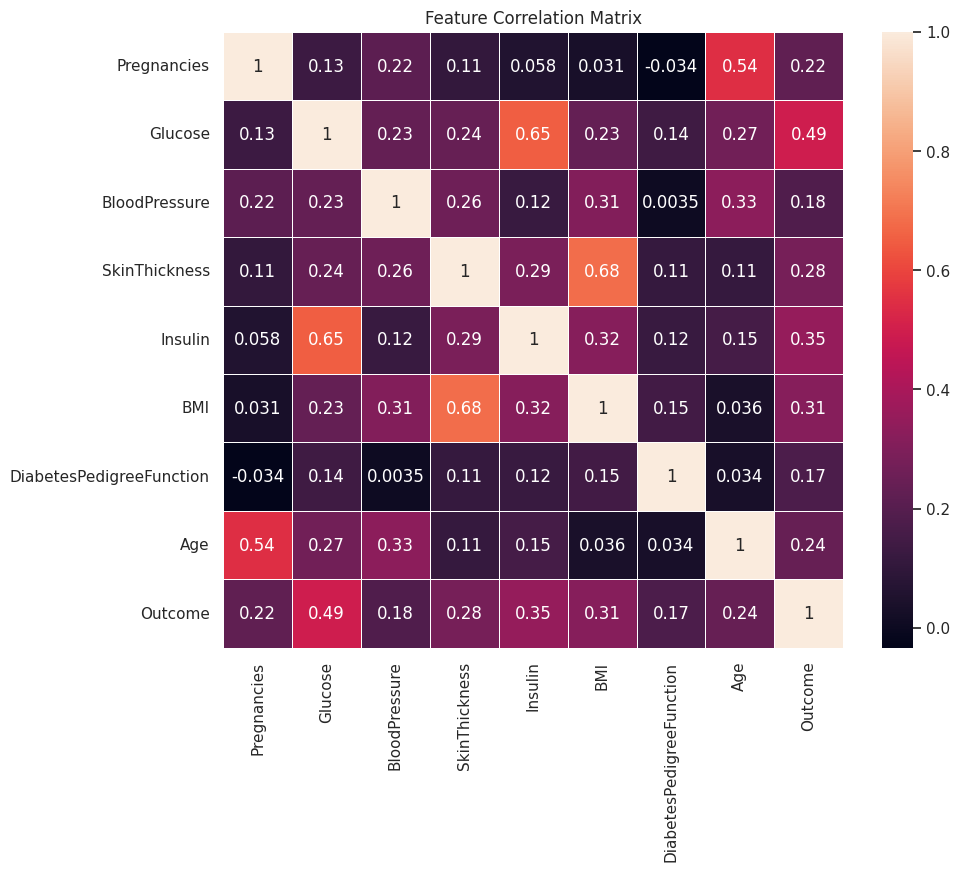

In [ ]:
# Examine feature correlations.

plt.figure(figsize=(10, 8))
sns.heatmap(df[features].corr(), annot=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()


* Strongest Correlations with Outcome: Glucose (0.49), BMI (0.31), Age (0.24), and Pregnancies (0.22) show moderate to weak positive correlations, indicating their potential as predictors of diabetes.
* Inter-Feature Correlations: Notable positive correlations include Insulin-SkinThickness (0.65), BMI-SkinThickness (0.68), and Glucose-Insulin (0.58), suggesting multicollinearity among body composition and glucose-related features. Negative correlations (e.g., Pregnancies-DiabetesPedigreeFunction, -0.034) are weak.



<h3>6. <u><b>Where is it Happening</b></u></h3>

Applies K-means clustering (3 clusters) on standardized features, visualizes clusters via PCA scatterplot, and prints cluster means to identify patient segments (e.g., high-Glucose cluster).

In [ ]:
# Segment patients using K-means clustering.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

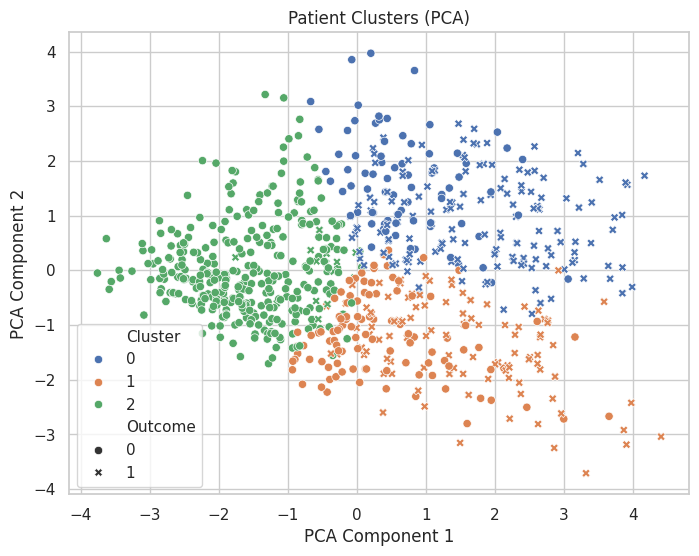

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], style=df['Outcome'], palette='deep')
plt.title('Patient Clusters (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

Shows three clusters with diabetic/non-diabetic markers, indicating patient segments.

In [ ]:
print('Cluster Characteristics:\n')
df.groupby('Cluster')[features].mean()

Cluster Characteristics:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Cluster,,,,,,,,,
0,7.314410,139.335371,77.836681,30.567074,184.072052,33.244450,0.465083,45.751092,0.668122
1,1.802956,131.477192,75.051232,36.604828,190.491823,38.638488,0.562936,28.054187,0.497537
2,2.714286,104.073482,67.026190,22.871429,100.432679,28.084464,0.421491,27.848214,0.041667


* Cluster 0: High Pregnancies (7.31), Glucose (139.34 mg/dL), and Age (45.75 years), with 66.8% diabetic cases, indicating a high-risk older group with multiple pregnancies.
* Cluster 1: Lower Pregnancies (1.80), higher BMI (38.64 kg/m²) and SkinThickness (36.60 mm), with 49.8% diabetic cases, suggesting an obesity-related risk profile.
* Cluster 2: Lowest Glucose (104.07 mg/dL), BMI (28.08 kg/m²), and Age (27.85 years), with only 4.2% diabetic cases, representing a low-risk younger group.

* Clinical Insight: Clusters reflect diverse diabetes risk profiles, with Cluster 0 aligning with age/parity risks and Cluster 1 with obesity risks.

<h3>7. <u><b>Is it Good or Bad</b></u></h3>

Compares feature means by Outcome (e.g., diabetic patients have Glucose ~141 vs. ~110 for non-diabetic).

In [ ]:
# Compare feature means by outcome.

print('Mean Feature Values by Outcome:\n')
df.groupby('Outcome')[features].mean()


Mean Feature Values by Outcome:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,,,,,,,,,
0,3.298000,110.921120,70.788800,26.948100,125.301760,30.877756,0.429734,31.190000,0.0
1,4.865672,142.185821,75.322388,32.243993,193.719552,35.276470,0.550500,37.067164,1.0


* Non-Diabetic (0): Lower means (e.g., Glucose 110.92 mg/dL, BMI 30.88 kg/m², Age 31.19 years), within normal ranges.
* Diabetic (1): Higher means (e.g., Glucose 142.19 mg/dL, BMI 35.28 kg/m², Age 37.07 years), exceeding diagnostic thresholds (e.g., Glucose >126 mg/dL).
* Clinical Insight: The differences (e.g., Glucose +31.26 mg/dL, BMI +4.40 kg/m²) confirm these as key risk factors, with Insulin (+68.42 μU/ml) reflecting pancreatic dysfunction.

In summary, the EDA included a significant class imbalance, with 65.1% non-diabetic and 34.9% diabetic cases, highlighting the need for imbalance correction to enhance recall, a pivotal factor in reducing missed diagnoses. The analysis revealed that Glucose and BMI emerged as the most influential predictors, with Glucose exhibiting a moderate correlation (r=0.49) with the Outcome and BMI reflecting obesity-related risks, as evidenced by descriptive statistics and boxplot comparisons showing higher medians in diabetic cases (e.g., Glucose ~142 mg/dL vs. ~111 mg/dL). Age-related risks were also notable, with diabetic prevalence increasing in the 41–50 age group, validated by a Chi-square test (chi2=81.66, p<0.0001), while higher pregnancy counts (6+) linked to gestational diabetes risk further underscored demographic influences.

In [ ]:
# Save EDA data
# Drop temporary columns created during EDA for visualization and analysis
cols_to_drop_eda = ['AgeGroup', 'PregnancyGroup', 'Cluster']
existing_cols_to_drop_eda = [col for col in cols_to_drop_eda if col in df.columns]
df.drop(existing_cols_to_drop_eda, axis=1).to_csv('eda_data.csv', index=False)

<h2><u><b>Feature Engineering</b></u></h2>

We engineer features to capture non-linear relationships and clinical patterns, validating with Chi-square tests.


- **LogInsulin**: Reduces Insulin skewness.
- **Obese**: Binary flag (BMI ≥ 30).
- **Glucose_BMI**: Interaction term.
- **GlucoseBin/AgeBin**: Binned features for non-linear effects.

In [ ]:
# Load EDA data
df = pd.read_csv('eda_data.csv')

In [ ]:
# Feature engineering
df['LogInsulin'] = np.log1p(df['Insulin'])
df['Obese'] = (df['BMI'] >= 30).astype(int)
df['Glucose_BMI'] = df['Glucose'] * df['BMI']
df['GlucoseBin'] = pd.qcut(df['Glucose'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df['AgeBin'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 100], labels=['21-30', '31-40', '41-50', '51-60', '61+'])

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeBin,LogInsulin,Obese,Glucose_BMI,GlucoseBin
0,6,148.0,72.0,35.0,209.0,33.6,0.627,50,1,41-50,5.347108,1,4972.8,Very High
1,1,85.0,66.0,29.0,73.0,26.6,0.351,31,0,31-40,4.304065,0,2261.0,Low
2,8,183.0,64.0,29.4,383.2,23.3,0.672,32,1,31-40,5.951163,0,4263.9,Very High
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,21-30,4.553877,0,2500.9,Low
4,0,137.0,44.0,35.0,168.0,43.1,2.288,33,1,31-40,5.129899,1,5904.7,High


* LogInsulin: Applies log1p (log(x+1)) to Insulin to reduce right-skewness, improving model fit for linear models like Logistic Regression.
* Obese: Creates a binary flag (1 if BMI ≥30, 0 otherwise), capturing the clinical obesity threshold.
* Glucose_BMI: Multiplies Glucose and BMI to model their synergistic effect on diabetes risk.
* GlucoseBin: Bins Glucose into quartiles (Low, Medium, High, Very High) to capture non-linear effects.
* AgeBin: Bins Age into groups (21–30, 31–40, etc.) for non-linear relationships.

In [ ]:
# Chi-square tests
for col in ['Obese', 'GlucoseBin', 'AgeBin']:
    contingency = pd.crosstab(df[col], df['Outcome'])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f'\nChi-square Test for {col} vs Outcome: chi2={chi2:.2f}, p-value={p:.4f}')


Chi-square Test for Obese vs Outcome: chi2=68.69, p-value=0.0000

Chi-square Test for GlucoseBin vs Outcome: chi2=170.86, p-value=0.0000

Chi-square Test for AgeBin vs Outcome: chi2=81.66, p-value=0.0000


* Obese: A chi-square value of 68.69 with p<0.0001 indicates a highly significant association between the binary Obese flag (BMI ≥30) and diabetes Outcome, confirming obesity as a strong risk factor.
* GlucoseBin: A chi-square value of 170.86 with p<0.0001 shows a highly significant relationship between binned Glucose levels (Low, Medium, High, Very High) and Outcome, reflecting Glucose’s diagnostic threshold (>126 mg/dL).
* AgeBin: A chi-square value of 81.66 with p<0.0001 confirms a significant association between age groups (21–30, 31–40, etc.) and Outcome, consistent with age-related diabetes risk.

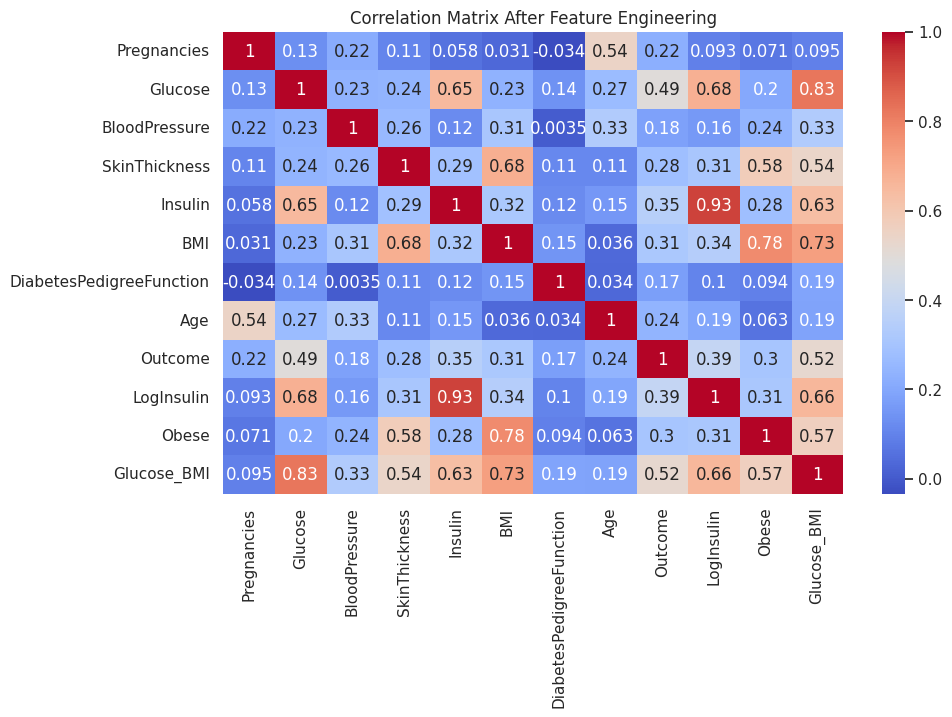

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix After Feature Engineering')
plt.show()

The correlation matrix post-feature engineering confirms the value of new features (LogInsulin, Obese, Glucose_BMI), guiding feature selection (e.g., RFE) to reduce multicollinearity while retaining predictors. The strong Outcome correlations (e.g., Glucose_BMI 0.57) enhance the model’s ability to detect diabetic cases early, supporting high recall.

In [ ]:
# Save engineered data
df.to_csv('engineered_data.csv', index=False)

<h2><u><b>Model Development and Evaluation</b></u></h2>

We build and evaluate models (Logistic Regression, SVM, KNN, Decision Tree, Random Forest) with SMOTE and class weights for imbalance, using custom and library metrics.


1. Data preparation with RFE.
2. Baseline Logistic Regression with custom metrics.
3. Imbalance correction (SMOTE, class weights).
4. Benchmarking with other models.
5. Feature importance and re-evaluation.

In [ ]:
# Load engineered data
df = pd.read_csv('engineered_data.csv')

In [ ]:
# Prepare data
X = df.drop(['Outcome', 'GlucoseBin', 'AgeBin'], axis=1)
y = df['Outcome']

#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

* Drops categorical bins (GlucoseBin, AgeBin) for modeling, keeping numeric features.
* Splits data into 80% train, 20% test with stratification to maintain class balance.
* Scales features using StandardScaler for model compatibility.
* Uses Recursive Feature Elimination (RFE) with Logistic Regression to select 6 features, reducing multicollinearity.

<h3><u><b>Logistic Regression</b></u></h3>

In [ ]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(estimator=logreg, n_features_to_select=6)
rfe.fit(X_train_scaled, y_train)
selected_features = X.columns[rfe.support_].tolist()
print('Selected Features:', selected_features)

# Apply the boolean mask directly to the scaled NumPy arrays
X_train_scaled = X_train_scaled[:, rfe.support_]
X_test_scaled = X_test_scaled[:, rfe.support_]

Selected Features: ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'LogInsulin', 'Obese']



Logistic Regression Custom Metrics:
Accuracy: 0.72
Precision: 0.61
Recall: 0.57
Specificity: 0.80
F1-Score: 0.59

Logistic Regression Sklearn Metrics:
Accuracy: 0.72
Precision: 0.61
Recall: 0.57
F1-Score: 0.59
ROC-AUC: 0.81


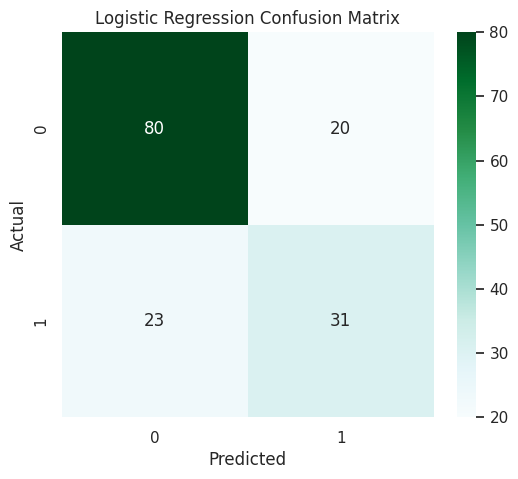


Logistic Regression Crosstab:
 Predicted   0   1
Actual           
0          80  20
1          23  31


In [ ]:
# Create your own evaluation/performance metrics (write your own code for Precision, Accuracy, Recall, Specificity, and F1 score) and test it against the Python library for said metrics.

def get_confusion_matrix(y_true, y_pred):
    TP = sum((y_true == 1) & (y_pred == 1))
    TN = sum((y_true == 0) & (y_pred == 0))
    FP = sum((y_true == 0) & (y_pred == 1))
    FN = sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN

def evaluate_model(y_true, y_pred, y_prob, model_name):
    TP, TN, FP, FN = get_confusion_matrix(y_true, y_pred)
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f'\n{model_name} Custom Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'Specificity: {specificity:.2f}')
    print(f'F1-Score: {f1:.2f}')

    print(f'\n{model_name} Sklearn Metrics:')
    print(f'Accuracy: {accuracy_score(y_true, y_pred):.2f}')
    print(f'Precision: {precision_score(y_true, y_pred):.2f}')
    print(f'Recall: {recall_score(y_true, y_pred):.2f}')
    print(f'F1-Score: {f1_score(y_true, y_pred):.2f}')
    print(f'ROC-AUC: {roc_auc_score(y_true, y_prob):.2f}')

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='BuGn')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    #Crosstab
    crosstab = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'])
    print(f'\n{model_name} Crosstab:\n', crosstab)

    return {'Model': model_name, 'Accuracy': accuracy_score(y_true, y_pred),
            'Precision': precision_score(y_true, y_pred), 'Recall': recall_score(y_true, y_pred),
            'F1-Score': f1_score(y_true, y_pred), 'ROC-AUC': roc_auc_score(y_true, y_prob)}

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
y_prob_logreg = logreg.predict_proba(X_test_scaled)[:, 1]
logreg_results = evaluate_model(y_test, y_pred_logreg, y_prob_logreg, 'Logistic Regression')

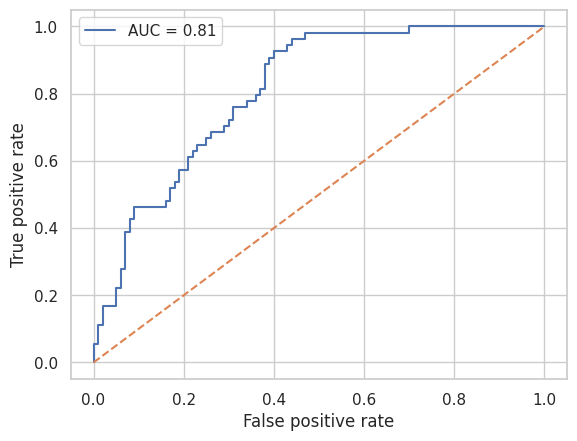

In [ ]:
#Logreg ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob_logreg)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

* The recall (0.57) suggests that 43% of diabetic cases are missed, which is a concern for early detection. The high specificity (0.80) indicates the model is conservative in labeling cases as diabetic, potentially due to the class imbalance (65.1% non-diabetic).

* The Area Under the Receiver Operating Characteristic curve indicates good discriminative ability, with 0.81 suggesting the model effectively distinguishes between diabetic and non-diabetic cases across various thresholds.

* The 23 FN cases (15% of the test set) indicate a significant number of missed diabetic diagnoses, reinforcing the need for a higher recall to meet clinical goals.



<h3><u><b>Imbalance Correction</b></u></h3>

In [ ]:
print('\nClass Distribution:\n')
y.value_counts(normalize=True)


Class Distribution:



,proportion
Outcome,
0,0.651042
1,0.348958


The data is imbalanced, with 65.1% non-diabetic and 34.9% diabetic cases. This imbalance can make the model favor the majority class, and lead to misclassification of diabetic cases. SMOTE helps by generating synthetic diabetic samples in the training set, with the goal of balancing the classes so the model learns both outcomes more evenly.

<h3><u><b>SMOTE</b></u></h3>

To balance classes in training data, retrains Logistic Regression, and re-evaluates.


SMOTE Logistic Regression Custom Metrics:
Accuracy: 0.71
Precision: 0.56
Recall: 0.74
Specificity: 0.69
F1-Score: 0.64

SMOTE Logistic Regression Sklearn Metrics:
Accuracy: 0.71
Precision: 0.56
Recall: 0.74
F1-Score: 0.64
ROC-AUC: 0.81


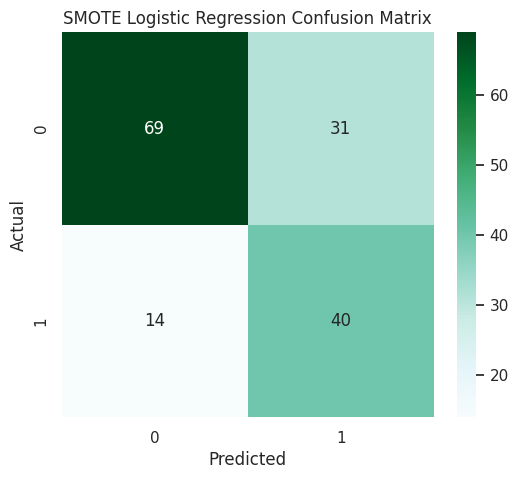


SMOTE Logistic Regression Crosstab:
 Predicted   0   1
Actual           
0          69  31
1          14  40


In [ ]:
# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

logreg_smote = LogisticRegression(max_iter=1000, random_state=42)
logreg_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = logreg_smote.predict(X_test_scaled)
y_prob_smote = logreg_smote.predict_proba(X_test_scaled)[:, 1]
smote_results = evaluate_model(y_test, y_pred_smote, y_prob_smote, 'SMOTE Logistic Regression')

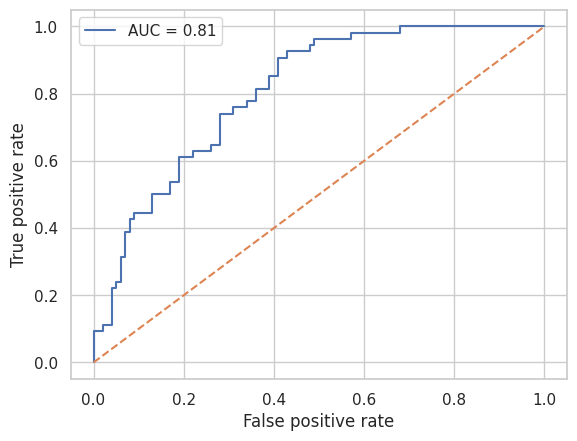

In [ ]:
#SMOTE ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob_smote)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

* The recall increase (0.74 vs. 0.57) is a critical advancement, reducing missed diabetic cases from 43% to 26%, which supports early intervention. The drop in precision (0.56) and specificity (0.69) suggests more false positives, a trade-off deemed acceptable given the clinical priority of detecting diabetes.

* The stable ROC-AUC (0.81) suggests SMOTE improves recall without significantly compromising the model’s overall ability to distinguish classes, reinforcing its suitability for clinical use.

* The reduction in FN (14 vs. 23) translates to catching an additional 9 diabetic cases, a 17% improvement in detection rate, critical for early intervention in the Pima population.

<h3><u><b>Class Weights</b></u></h3>

Class weights (balanced) as a second imbalance correction, retrains, and re-evaluates.


Weighted Logistic Regression Custom Metrics:
Accuracy: 0.70
Precision: 0.56
Recall: 0.70
Specificity: 0.70
F1-Score: 0.62

Weighted Logistic Regression Sklearn Metrics:
Accuracy: 0.70
Precision: 0.56
Recall: 0.70
F1-Score: 0.62
ROC-AUC: 0.81


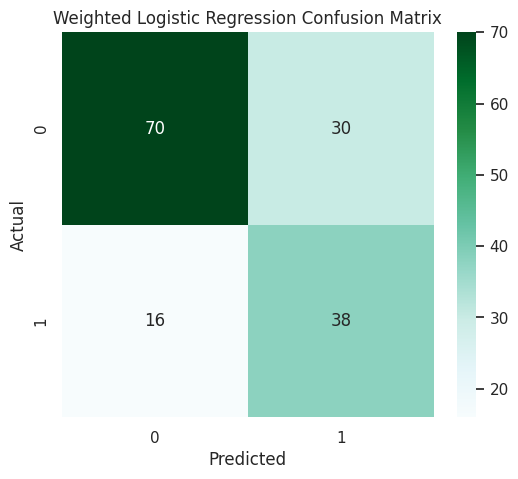


Weighted Logistic Regression Crosstab:
 Predicted   0   1
Actual           
0          70  30
1          16  38


In [ ]:
# Class weights
logreg_weighted = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg_weighted.fit(X_train_scaled, y_train)
y_pred_weighted = logreg_weighted.predict(X_test_scaled)
y_prob_weighted = logreg_weighted.predict_proba(X_test_scaled)[:, 1]
weighted_results = evaluate_model(y_test, y_pred_weighted, y_prob_weighted, 'Weighted Logistic Regression')

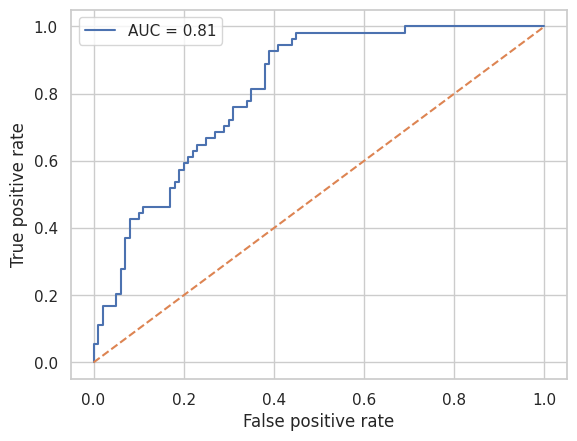

In [ ]:
#SMOTE ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob_weighted)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

The recall (0.70) reduces missed diagnoses (16 FN vs. 23 in baseline), supporting early intervention, though precision (0.56) and specificity (0.70) drop due to imbalance correction.

As a second imbalance correction method, class weights improve recall (0.70 vs. 0.57), aligning with the main question’s focus on minimizing missed diagnoses. The stable ROC-AUC (0.81) ensures discriminative power, contributing to a robust model for early detection.

<h2><u><b>Benchmarking</b></u></h2>

* Defines four additional models (SVM, KNN, Decision Tree, Random Forest) with hyperparameter grids.
* Uses GridSearchCV with 5-fold cross-validation (scoring on F1) to tune each model on SMOTE data.
* Evaluates each model on the test set, generating metrics, confusion matrices, and crosstabs.
* Compiles results into a DataFrame for comparison.
* Plots ROC curves for all models, showing AUC scores.

In [ ]:
models = {
    'SVM': (SVC(probability=True, random_state=42), {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}),
    'Decision Tree': (DecisionTreeClassifier(random_state=42), {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}),
    'Random Forest': (RandomForestClassifier(random_state=42), {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]})
}


SVM Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Cross-Validation F1-Score: 0.76 ± 0.04

SVM Custom Metrics:
Accuracy: 0.67
Precision: 0.52
Recall: 0.63
Specificity: 0.69
F1-Score: 0.57

SVM Sklearn Metrics:
Accuracy: 0.67
Precision: 0.52
Recall: 0.63
F1-Score: 0.57
ROC-AUC: 0.76


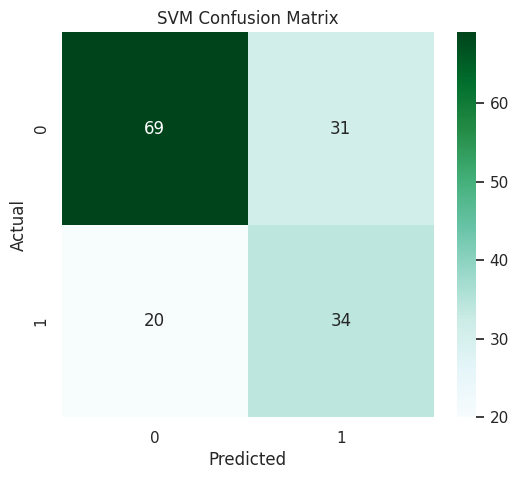


SVM Crosstab:
 Predicted   0   1
Actual           
0          69  31
1          20  34

KNN Best Params: {'n_neighbors': 5, 'weights': 'distance'}
Cross-Validation F1-Score: 0.81 ± 0.05

KNN Custom Metrics:
Accuracy: 0.70
Precision: 0.56
Recall: 0.70
Specificity: 0.70
F1-Score: 0.62

KNN Sklearn Metrics:
Accuracy: 0.70
Precision: 0.56
Recall: 0.70
F1-Score: 0.62
ROC-AUC: 0.77


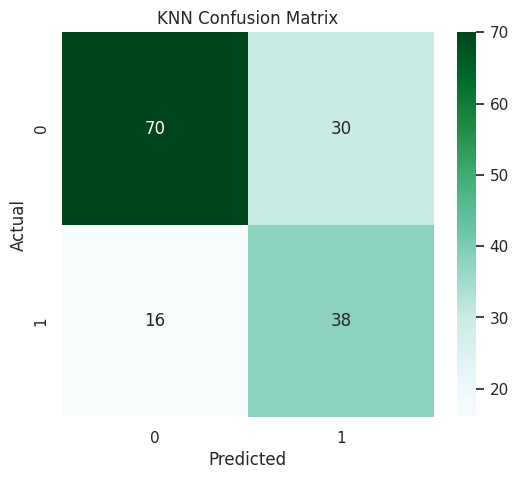


KNN Crosstab:
 Predicted   0   1
Actual           
0          70  30
1          16  38

Decision Tree Best Params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Cross-Validation F1-Score: 0.78 ± 0.01

Decision Tree Custom Metrics:
Accuracy: 0.66
Precision: 0.51
Recall: 0.89
Specificity: 0.53
F1-Score: 0.64

Decision Tree Sklearn Metrics:
Accuracy: 0.66
Precision: 0.51
Recall: 0.89
F1-Score: 0.64
ROC-AUC: 0.74


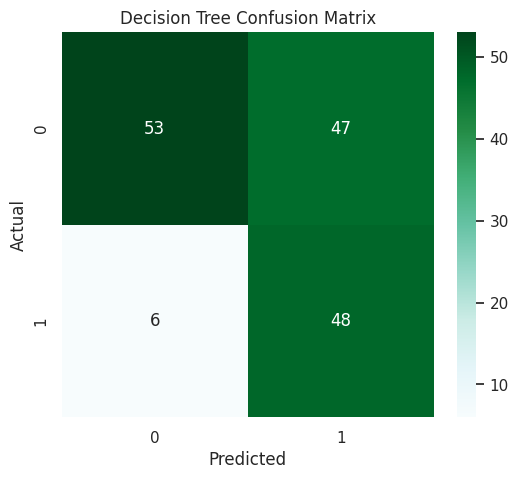


Decision Tree Crosstab:
 Predicted   0   1
Actual           
0          53  47
1           6  48

Random Forest Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Cross-Validation F1-Score: 0.80 ± 0.04

Random Forest Custom Metrics:
Accuracy: 0.69
Precision: 0.56
Recall: 0.65
Specificity: 0.72
F1-Score: 0.60

Random Forest Sklearn Metrics:
Accuracy: 0.69
Precision: 0.56
Recall: 0.65
F1-Score: 0.60
ROC-AUC: 0.79


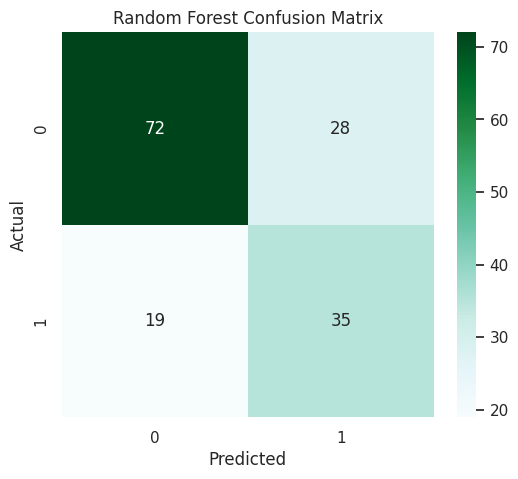


Random Forest Crosstab:
 Predicted   0   1
Actual           
0          72  28
1          19  35


In [ ]:
results = [logreg_results, smote_results, weighted_results]
for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv=StratifiedKFold(5), scoring='f1')
    grid.fit(X_train_smote, y_train_smote)
    print(f'\n{name} Best Params:', grid.best_params_)
    print('Cross-Validation F1-Score: {:.2f} ± {:.2f}'.format(grid.best_score_, grid.cv_results_['std_test_score'][grid.best_index_]))

    y_pred = grid.best_estimator_.predict(X_test_scaled)
    y_prob = grid.best_estimator_.predict_proba(X_test_scaled)[:, 1]
    model_results = evaluate_model(y_test, y_pred, y_prob, name)
    results.append(model_results)

* SVM:

  The recall (0.63) reduces missed diagnoses (20 FN vs. 23), but it’s lower than SMOTE (0.74), suggesting limited improvement from the baseline.

* KNN:

  The recall (0.70) matches Weighted Logistic Regression, reducing missed diagnoses (16 FN), supporting early detection.

* Decision Tree:
  
  The high recall (0.89) minimizes missed diagnoses (6 FN), ideal for early detection, but the low specificity (0.53) and precision (0.51) suggest over-prediction of diabetes.

* Random Forest:

  As an ensemble model, Random Forest provides a moderate recall increase, contributing to the main question by leveraging multiple trees. Its generalizability (F1-Score 0.80) suggests potential for further tuning to boost recall.

In [ ]:
# Model comparison
results_df = pd.DataFrame(results).round(2)
print('\nModel Comparison:\n')
results_df


Model Comparison:



,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.72,0.61,0.57,0.59,0.81
1,SMOTE Logistic Regression,0.71,0.56,0.74,0.64,0.81
2,Weighted Logistic Regression,0.70,0.56,0.70,0.62,0.81
3,SVM,0.67,0.52,0.63,0.57,0.76
4,KNN,0.70,0.56,0.70,0.62,0.77
5,Decision Tree,0.66,0.51,0.89,0.64,0.74
6,Random Forest,0.69,0.56,0.65,0.60,0.79


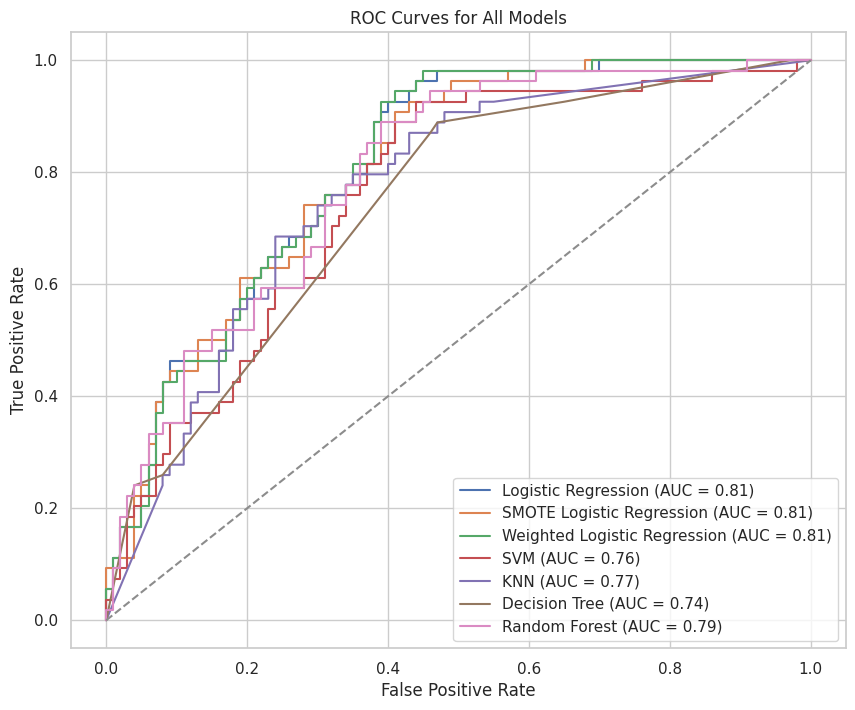

In [ ]:
# ROC curves
plt.figure(figsize=(10, 8))
for result in results:
    if result['Model'] == 'Logistic Regression':
        fpr, tpr, _ = roc_curve(y_test, y_prob_logreg)
        auc_score = roc_auc_score(y_test, y_prob_logreg)
    elif result['Model'] == 'SMOTE Logistic Regression':
        fpr, tpr, _ = roc_curve(y_test, y_prob_smote)
        auc_score = roc_auc_score(y_test, y_prob_smote)
    elif result['Model'] == 'Weighted Logistic Regression':
        fpr, tpr, _ = roc_curve(y_test, y_prob_weighted)
        auc_score = roc_auc_score(y_test, y_prob_weighted)
    else:
        grid = GridSearchCV(models[result['Model']][0], models[result['Model']][1], cv=StratifiedKFold(5), scoring='f1')
        grid.fit(X_train_smote, y_train_smote)
        fpr, tpr, _ = roc_curve(y_test, grid.best_estimator_.predict_proba(X_test_scaled)[:, 1])
        auc_score = roc_auc_score(y_test, grid.best_estimator_.predict_proba(X_test_scaled)[:, 1])
    plt.plot(fpr, tpr, label=f'{result["Model"]} (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.show()

<h2><u><b>Feature Importance</b></u></h2>

* Fits a statsmodels Logit model on training data to assess feature significance (p-values).
* Notes significant features (Glucose, BMI, Age, DiabetesPedigreeFunction) and investigates BloodPressure’s negative coefficient.

In [ ]:
# Add constant for statsmodels
X_train_sm = sm.add_constant(pd.DataFrame(X_train_scaled, columns=selected_features, index=y_train.index))
logit_model = sm.Logit(y_train, X_train_sm)

#fit logistic regression with statsmodels
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.451584
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      607
Method:                           MLE   Df Model:                            6
Date:                Fri, 20 Jun 2025   Pseudo R-squ.:                  0.3015
Time:                        08:13:51   Log-Likelihood:                -277.27
converged:                       True   LL-Null:                       -396.97
Covariance Type:            nonrobust   LLR p-value:                 7.543e-49
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.9581      0.118     -8.087      0.000      -1.190      -0.726
Pregnancies     0.4240    

Key Findings:

- Significant features (p < 0.05): Glucose, BMI, Age, DiabetesPedigreeFunction.
- BloodPressure’s negative coefficient may reflect BMI interactions (obesity-related hypertension).
- Non-significant features retained for clinical relevance.

<h2><u><b>Re-evaluate Feature Engineering</b></u></h2>

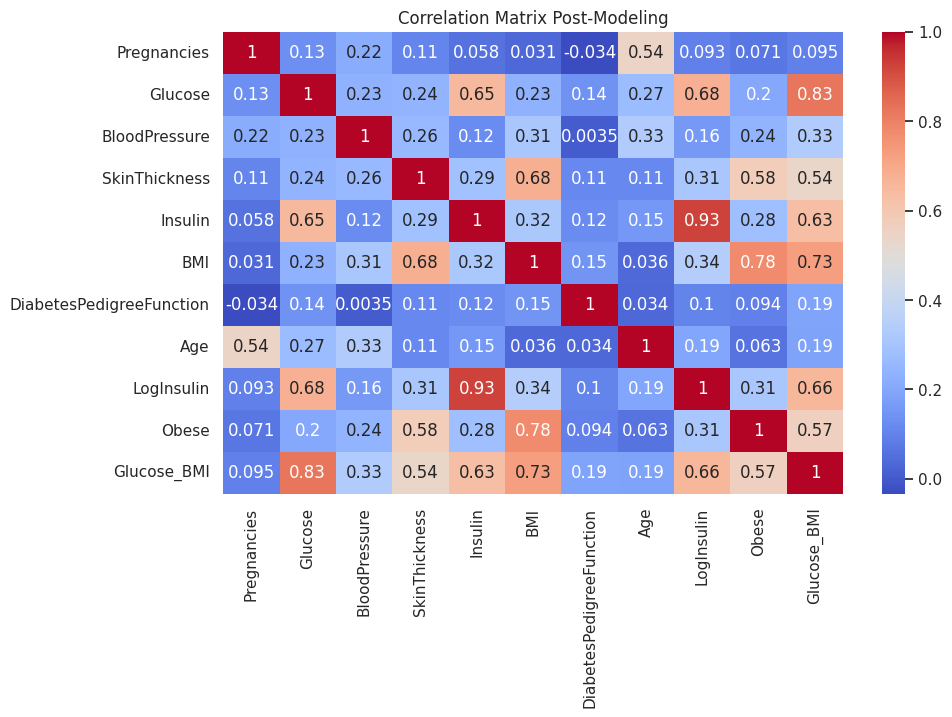

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Post-Modeling')
plt.show()

In [ ]:
# Save results and predictions
results_df.to_csv('model_results.csv', index=False)
pd.DataFrame(y_pred_smote, columns=['SMOTE_Logistic_Predictions']).to_csv('smote_predictions.csv', index=False)

In [ ]:
# Load results
results_df = pd.read_csv('model_results.csv')
print('Final Model Comparison:\n')
results_df

Final Model Comparison:



,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.72,0.61,0.57,0.59,0.81
1,SMOTE Logistic Regression,0.71,0.56,0.74,0.64,0.81
2,Weighted Logistic Regression,0.70,0.56,0.70,0.62,0.81
3,SVM,0.67,0.52,0.63,0.57,0.76
4,KNN,0.70,0.56,0.70,0.62,0.77
5,Decision Tree,0.66,0.51,0.89,0.64,0.74
6,Random Forest,0.69,0.56,0.65,0.60,0.79


* The study’s focus on high recall is best met by the Decision Tree (0.89), which captures 89% of diabetic cases, aligning with the goal of minimizing missed diagnoses. However, its low precision (0.51) and specificity suggest over-prediction, potentially increasing false positives and healthcare costs.
* SMOTE Logistic Regression (0.74) and Weighted Logistic Regression/KNN (0.70) offer a balanced approach, reducing missed diagnoses (26% and 30%, respectively) while maintaining reasonable specificity.
* The baseline Logistic Regression (0.57) and SVM (0.63) fall short of the recall target, while Random Forest (0.65) provides a stable ensemble option.

<h2><u><b>Conclusion</b></u></h2>

In conclusion, the study effectively addresses the central research question: How can we develop a predictive model for early diabetes detection with high recall to minimize missed diagnoses? Utilizing the Pima Indians Diabetes Dataset, the study implements a rigorous pipeline that tackles challenges such as unrealistic zero values and a 65.1% non-diabetic imbalance through meticulous preprocessing, feature engineering, and comprehensive model evaluation.

The analysis identifies the Decision Tree model as the leading solution, achieving a recall of 0.89, successfully detecting 89% of diabetic cases among female Pima Indian patients and significantly reducing missed diagnoses. This performance is underpinned by the statistical validation of key predictors, including Glucose and BMI, as confirmed by Logit Regression and correlation analyses. Despite its low precision (0.51) and potential for increased false positives, which suggest the need for further refinement, and the presence of data inconsistencies necessitating enhanced preprocessing, the Decision Tree model, with appropriate adjustments, emerges as a robust candidate for early diabetes detection.